# === readme ===
descrip: python template for jupyter notebook

update history: <br>
v1.0 DL 2020Oct07

extra notes: <br>
use jupyter lab and Abishek's python virtual env (/ihesp/shared/conda/envs/jupyterlab_env) for dask <br>

##  === import modules ===

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy

# python GCM(POP) packages
import xgcm
import pop_tools
import xesmf as xe
import seawater as sw

# dask jupyter lab packages
from dask.distributed import Client
from dask.distributed import performance_report

# file name with time packages
from itertools import product
from cftime import DatetimeNoLeap

# incorporate dask 
use initiateDask_2020Nov30.ipynb to initiate dask and incorporate dask with tcp address

In [3]:
client = Client("tcp://10.72.21.3:41645")
client

Client Scheduler: tcp://10.72.15.52:36502 Dashboard: http://10.72.15.52:8787/status,Cluster Workers: 4 Cores: 8 Memory: 32.00 GB


##  === define variables ===

In [4]:
indir = '/ihesp/archive/HRMIP/B.E.13.B1950C5.ne120_t12.cesm-ihesp-1950cntl.013/ocn/hist/';
infile = indir + 'B.E.13.B1950C5.ne120_t12.cesm-ihesp-1950cntl.013.pop.h.nday1.0155-07-01.nc';

ds = xr.open_dataset(infile) # ds: data set
ds # look at overview of metadata for file

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 31, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 0155-07-02 00:00:00 ... 0155-08-01 00:00:00
  * z_t                 (z_t) float32 500.0 1500.0 ... 562499.06 587499.06
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 549999.06 574999.06
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 549999.06 574999.06
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 574999.06 599999.06
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    TLONG               (nlat, nlon) float64 ...
    TLAT                (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w) float32 ...
    KMT                 (nlat, nlon) float64 ...
    KMU                 (nlat, nlon) float64 ...
    REGION_MASK         (nlat, nlon) float64 ...
    UAREA               (nlat, nlon) float64 ...
    TAREA               (nlat, nlon) float64 ...
    HU                  (nlat, nlon) float64 ...
    HT                  (nlat, nlon) float64 ...
    DXU                 (nlat, nlon) float64 ...
    DYU                 (nlat, nlon) float64 ...
    DXT                 (nlat, nlon) float64 ...
    DYT                 (nlat, nlon) float64 ...
    HTN                 (nlat, nlon) float64 ...
    HTE                 (nlat, nlon) float64 ...
    HUS                 (nlat, nlon) float64 ...
    HUW                 (nlat, nlon) float64 ...
    ANGLE               (nlat, nlon) float64 ...
    ANGLET              (nlat, nlon) float64 ...
    days_in_norm_year   timedelta64[ns] ...
    grav                float64 ...
    omega               float64 ...
    radius              float64 ...
    cp_sw               float64 ...
    sound               float64 ...
    vonkar              float64 ...
    cp_air              float64 ...
    rho_air             float64 ...
    rho_sw              float64 ...
    rho_fw              float64 ...
    stefan_boltzmann    float64 ...
    latent_heat_vapor   float64 ...
    latent_heat_fusion  float64 ...
    ocn_ref_salinity    float64 ...
    sea_ice_salinity    float64 ...
    T0_Kelvin           float64 ...
    salt_to_ppt         float64 ...
    ppt_to_salt         float64 ...
    mass_to_Sv          float64 ...
    heat_to_PW          float64 ...
    salt_to_Svppt       float64 ...
    salt_to_mmday       float64 ...
    momentum_factor     float64 ...
    hflux_factor        float64 ...
    fwflux_factor       float64 ...
    salinity_factor     float64 ...
    sflux_factor        float64 ...
    nsurface_t          float64 ...
    nsurface_u          float64 ...
    U1_1                (time, nlat, nlon) float32 ...
    V1_1                (time, nlat, nlon) float32 ...
    U2_2                (time, nlat, nlon) float32 ...
    V2_2                (time, nlat, nlon) float32 ...
    SST                 (time, nlat, nlon) float32 ...
    SSS                 (time, nlat, nlon) float32 ...
    SSH                 (time, nlat, nlon) float32 ...
    SHF                 (time, nlat, nlon) float32 ...
    SHF_QSW             (time, nlat, nlon) float32 ...
    SFWF                (time, nlat, nlon) float32 ...
    TAUX                (time, nlat, nlon) float32 ...
    TAUY                (time, nlat, nlon) float32 ...
    EVAP_F              (time, nlat, nlon) float32 ...
    PREC_F              (time, nlat, nlon) float32 ...
    SNOW_F              (time, nlat, nlon) float32 ...
    MELT_F              (time, nlat, nlon) float32 ...
    ROFF_F              (time, nlat, nlon) float32 ...
    SALT_F              (time, nlat, nlon) float32 ...
    SENH_F              (time, nlat, nlon) float32 ...
    LWUP_F           

##  === data analysis ===

##  === make pics ===

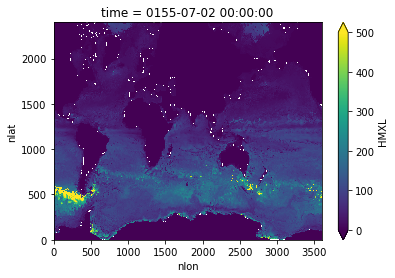

In [11]:
(ds.HMXL*0.01).isel(time=0).plot(vmin=0,vmax=500)